# Attention maps vizualization

In this example notebook, we will draw attention maps for given input images.

### Libraries

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from utils.datasets import load_data, load_labels
from pathlib import Path
import json
import cv2
from utils.attentions import calculate_mask

### Load the model weights

In [25]:
model_dir = Path("saved_models/fruits360_1")
model = load_vit_model(model_dir)

### Load test data

In [22]:
_, ds1 = load_data("mnist", batch_size=9)
_, ds2 = load_data("fruits-360", batch_size=9)

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [23]:
x, y = next(ds2)
labels = load_labels("fruits-360")

samples = tf.unstack(x)

In [26]:
predictions, att = model(x[:9], True)
predictions = np.argmax(predictions, axis=1)

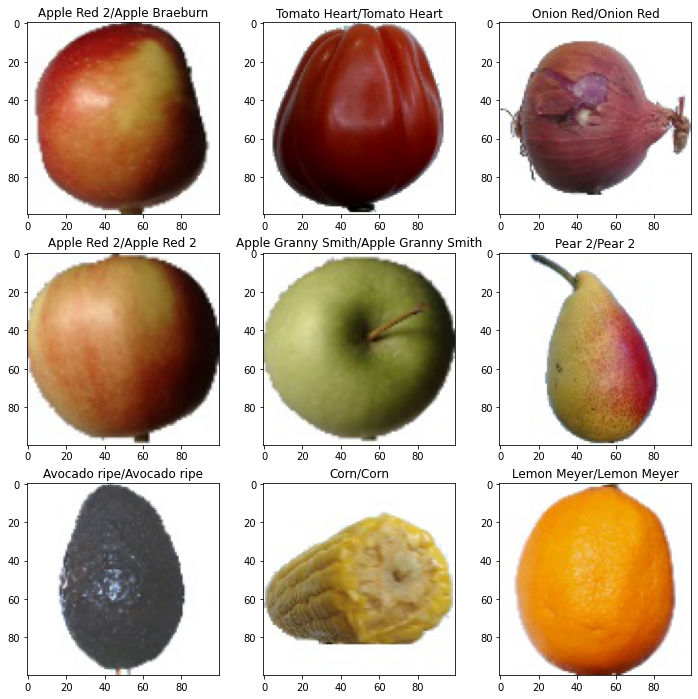

In [27]:
_, axs = plt.subplots(3, 3, figsize=(12, 12))
axs = axs.flatten()
for i, img, ax in zip(range(len(samples)), samples, axs):
    ax.imshow(img)
    ax.set_title(f"{labels[predictions[i]]}/{labels[int(y[i])]}")
plt.show()

### Calculating masks

In [28]:
masks = calculate_mask(model, samples)

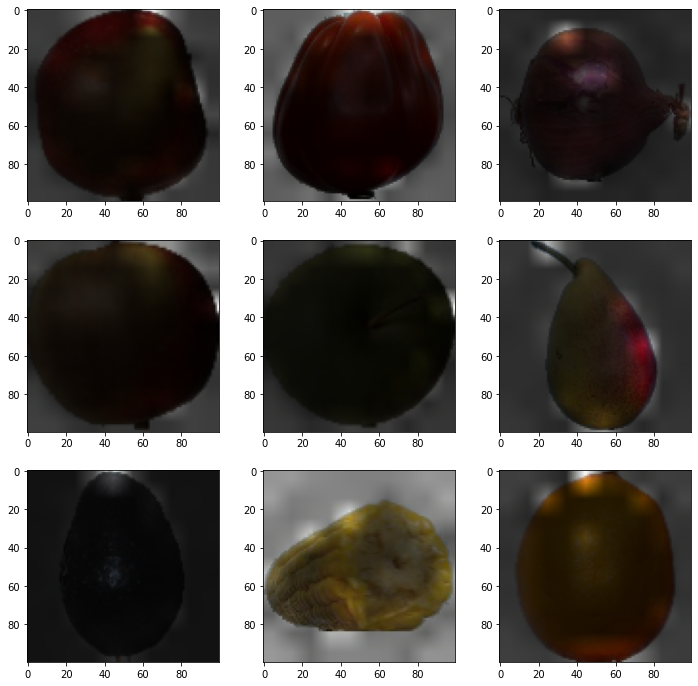

In [29]:
_, axs = plt.subplots(3, 3, figsize=(12, 12))
axs = axs.flatten()
for i, img, ax in zip(range(len(samples)), samples, axs):
    ax.imshow(img * masks[i])
plt.show()